https://machinelearningcompass.com/machine_learning_models/ridge_regression/

https://github.com/HeroKillerEver/coursera-deep-learning/blob/master/Improving%20Deep%20Neural%20Networks-Hyperparameter%20tuning%2C%20Regularization%20and%20Optimization/Tensorflow/tf_utils.py
https://github.com/Kulbear/deep-learning-coursera/blob/master/Improving%20Deep%20Neural%20Networks%20Hyperparameter%20tuning,%20Regularization%20and%20Optimization/Tensorflow%20Tutorial.ipynb

In [4]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import vaex
vaex.multithreading.thread_count_default = 8
import vaex.ml

In [5]:
sspp = pd.read_csv('/arc/home/aydanmckay/leftjoinpristinesspplamostlrsmilliquas.csv',
                   usecols=["CaHK_0_p","pmra_1_p","pmdec_1_p","g_chp_psf_p","r_chp_psf_p","i_chp_psf_p","z_chp_psf_p","y_chp_psf_p","MAG_AUTO_p",
                            "phot_g_mean_mag_1_p","phot_bp_mean_mag_1_p","phot_rp_mean_mag_1_p","AFE_s","FEH_ADOP_s","RA_q"])
sspp.FEH_ADOP_s.value_counts()

-9999.000000    72482
-0.970938          18
-1.623412           4
-1.229497           4
-0.572936           4
                ...  
-0.712517           1
-0.535879           1
-0.693920           1
-0.543458           1
-0.124109           1
Name: FEH_ADOP_s, Length: 37961, dtype: int64

In [6]:
# Gonna add a parameter which removes all of the pristine sources except the intercept with sspp for testing the algorithm.
sspp = sspp.loc[(sspp["g_chp_psf_p"] < 1e19) & (sspp["r_chp_psf_p"] < 1e19) & (sspp["i_chp_psf_p"] < 1e19) & \
                        (sspp["z_chp_psf_p"] < 1e19) & (sspp["y_chp_psf_p"] < 1e19) & (sspp["MAG_AUTO_p"] < 95) & \
                        (np.isnan(sspp["pmra_1_p"]) == False) & (np.isnan(sspp["pmdec_1_p"]) == False) & \
                        (np.isnan(sspp["phot_g_mean_mag_1_p"]) == False) & (np.isnan(sspp["phot_bp_mean_mag_1_p"]) == False) & \
                        (np.isnan(sspp["phot_rp_mean_mag_1_p"]) == False) & (np.isnan(sspp['RA_q']) == True) & (sspp['FEH_ADOP_s'] > -9000)]
# remove this later for semi supervised: (sspp['FEH_ADOP_s'] > -9000)
sspp.FEH_ADOP_s.value_counts()

-0.970938    18
-2.234864     4
-0.572936     4
-0.623528     4
-0.563320     4
             ..
-0.508577     1
-0.527734     1
-0.489074     1
-0.139976     1
-0.124109     1
Name: FEH_ADOP_s, Length: 37562, dtype: int64

In [7]:
# df = sspp.sample(n=10000)
df = sspp

In [21]:
df_joined = pd.DataFrame({'PMRA': df['pmra_1_p'],
                   'PMDec': df['pmdec_1_p'],
                   'G_gaia': df["CaHK_0_p"]-df['phot_g_mean_mag_1_p'],
                   'B_gaia': df["CaHK_0_p"]-df['phot_bp_mean_mag_1_p'],
                   'R_gaia': df["CaHK_0_p"]-df['phot_rp_mean_mag_1_p'],
                   'G_pan': df["CaHK_0_p"]-df['g_chp_psf_p'],
                   'R_pan': df["CaHK_0_p"]-df['r_chp_psf_p'],
                   'I_pan': df["CaHK_0_p"]-df['i_chp_psf_p'],
                   'Z_pan': df["CaHK_0_p"]-df['z_chp_psf_p'],
                   'Y_pan': df["CaHK_0_p"]-df['y_chp_psf_p'],
                   'AUTO_cfis': df["CaHK_0_p"]-df['MAG_AUTO_p']})
df2 = pd.DataFrame({'feh': df['FEH_ADOP_s']})

In [22]:
print(df_joined.shape)
df_joined = df_joined.dropna()
print(df_joined.shape)
print(df2.shape)
df2 = df2.dropna()
print(df2.shape)

(38345, 11)
(38345, 11)


In [23]:
from sklearn.linear_model import Ridge
# import numpy as np
# n_samples, n_features = 10000, 11
# rng = np.random.RandomState(0)
y = df2.to_numpy()
X = df_joined.to_numpy()
rdg = Ridge(alpha = 0.5)
rdg.fit(X, y)
rdg.score(X,y)

0.39503529826688777

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [35]:
def normal_equation_ridge_regression(X,y,alpha):
    intercept_ones = np.ones((len(X),1))        # results in array( [ [1],..,[1] ] )
    X_b = np.c_[intercept_ones,X]               # we now add the additional ones as a new column to our X
    I = np.identity(X_b.shape[1])               # identity matrix with dimensions (n+1)
    I[0][0] = 0                                 # adjusting the first value in I to be 0, to account for the intercept term
    theta_optimal = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y) # the normal equation
    return theta_optimal

In [36]:
theta_ridge_ne_1 = normal_equation_ridge_regression(X_train, y_train, 1)
print(theta_ridge_ne_1)
# output: [44.35714286 -2.76190476]

[[-3.13866272]
 [ 0.00572218]
 [ 0.01432658]
 [-1.18015404]
 [-1.1600985 ]
 [ 1.41058647]
 [ 1.95692455]
 [ 1.74003805]
 [-0.02996776]
 [-0.93826163]
 [-0.81649381]
 [-0.87807621]]


In [37]:
ridge = Ridge()  # same as Ridge(alpha=1)
ridge.fit(X_train, y_train, 1)
theta_ridge_ne_2 = np.array([ridge.intercept_, ridge.coef_[0]])
print(theta_ridge_ne_2)
# output: [44.35714286 -2.76190476]

[array([-3.13866272])
 array([ 0.00572218,  0.01432658, -1.18015404, -1.1600985 ,  1.41058647,
         1.95692455,  1.74003805, -0.02996776, -0.93826163, -0.81649381,
        -0.87807621])                                                   ]


/tmp/ipykernel_5382/2342277115.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  theta_ridge_ne_2 = np.array([ridge.intercept_, ridge.coef_[0]])


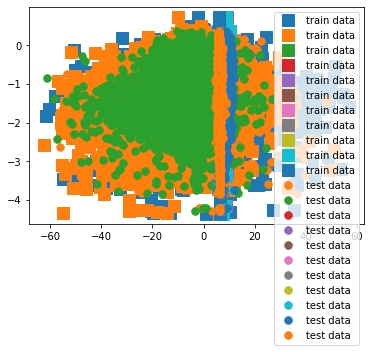

In [43]:
X_interval = np.array([np.min(X), np.max(X)]) # we'll use these points to plot our linear functions

plt.plot(X_train, y_train, "s", markersize=12, label="train data")
plt.plot(X_test, y_test, ".", markersize=15, label="test data")

# plt.plot(X_interval, ols.predict(X_interval), label="ols")
# plt.plot(X_interval, ridge.predict(X_interval) ,label="ridge")
plt.legend()

In [44]:
def gradient_descent(X, y, theta, criterion, number_of_iterations, learning_rate):
    X_b = add_intercept_ones(X)
    loss_history=[]
    for i in range(number_of_iterations):

        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(X_b) # predict our entire x
        loss = criterion(y,y_predicted) # calculate the error
        loss_history.append(loss)

        # perform optimization
        gradient = np.array([mse_derivative_b(y,y_predicted), mse_derivative_m(x,y,y_predicted)]) # calculate gradient
        theta = theta - learning_rate * gradient #adjust m and b

        if i%10==0:
            print("Current Epoch: {}, Current Loss: {}".format(i,loss))

    return theta,loss_history


In [45]:
def mse(y, y_predicted):
    error = y-y_predicted
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

def ridgeMSE(y, y_predicted, alpha, theta):
    mse = mse(y, y_predicted)
    ridge_mse = mse(y, y_predicted) + alpha * np.dot(theta,theta)
    return ridge_mse


In [46]:
def getRidgeMSEFunction(alpha=0.0001):

    def ridgeMSE(y, y_predicted, theta):
        mse_loss = mse(y, y_predicted)
        ridge_loss = mse_loss + alpha * np.dot(theta,theta)
        return ridge_loss

    return ridgeMSE


In [47]:
def getRidgeGradientFunction(alpha=0.0001):

    def ridgeGradient(X_b, y, y_pred, theta):
        return  -(2/y.size) * X_b.T.dot((y - y_pred)) + alpha * theta

    return ridgeGradient


In [48]:
def gradientDescent(X, y, theta, criterion, gradientFunction, number_of_iterations, learning_rate):
    X_b = add_intercept_ones(X)
    for i in range(number_of_iterations):

        # predict and calculate loss
        f = create_function(theta)               # create the current function
        y_predicted = X_b.dot(theta)             # predict our entire x
        loss = criterion(y, y_predicted, theta)  # calculate loss

        # perform optimization
        gradient = gradientFunction(X_b, y, y_predicted, theta) # compute gradient
        theta = theta - learning_rate * gradient                # adjust theta

    return theta


In [50]:
theta_ridge_gd_1 = gradientDescent(X_train, y_train, 1, getRidgeMSEFunction(0.0001),
                                            getRidgeGradientFunction(0.0001), 1000, 0.03)
print(theta_ridge_gd_1)
# output: [44.41801778 -3.11386069]


NameError: name 'add_intercept_ones' is not defined

In [ ]:
plt.plot(X_train, y_train, "s", markersize=12, label="train data")
plt.plot(X_test, y_test, ".", markersize=15, label="test data")

plt.plot(X, X_b.dot(theta_ridge_gd_1), label="ridge gd")
plt.plot(X, X_b.dot(theta_ridge_ne_1), label="ridge ne")
plt.legend()
plt.show()


In [ ]:
sgdreg_ridge = SGDRegressor(penalty="l2", learning_rate="constant", eta0=0.001, max_iter=10000, random_state=42)
sgdreg_ridge.fit(X_train,y_train)
theta_ridge_gd_2 = np.array([sgdreg_ridge.intercept_[0], sgdreg_ridge.coef_[0]])
print(theta_ridge_gd_2)
# output: [43.1764243 -2.0467813]


In [ ]:
X_days = X * 365 # let's ignore leap years for now


In [ ]:
print(theta_ridge_ne_1)
# output: [44.36 -2.76]
print(theta_ols_ne_1)
# output: [ 54.3 -11.6]

In [ ]:
print(theta_ols_days_ne)
# output: [54.3        -0.03178082]
print(theta_ridge_days_ne)
# output: [54.29968655 -0.03178006]

In [ ]:
X_days = X / 10


In [ ]:
print(theta_ols_decades_ne)
# output: [  54.3 -116. ]
print(theta_ridge_decades_ne)
# output: [41.29065421 -0.36137072]


In [ ]:
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10])
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)
# output: 0.1
